In [1]:
import torch
from torch_snippets import *

import sys
sys.path.append('..')
from unet_segmentation.engine.model_builder import UNet
from unet_segmentation.data_setup.circles_data_setup import create_dataloaders

In [2]:
model = UNet()
state_dict = torch.load('/home/alex/projects/ml/ml_hw/hw_cv/unet_segmentation/models/circles_segm_model_2023_10_23_09_25_33.pth')
model.load_state_dict(state_dict)

/home/alex/projects/ml/ml_course/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/alex/projects/ml/ml_course/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [7]:
_, val_dl = create_dataloaders(10, 1, 1, device='cpu')

In [8]:
im, mask = next(iter(val_dl))
_mask = model(im)

In [9]:
_, _mask = torch.max(_mask, dim=1)

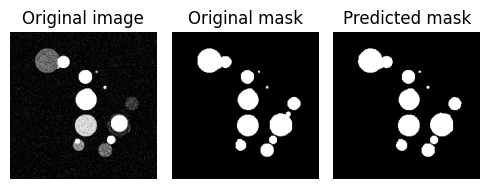

In [10]:
subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0], \
          _mask.permute(1,2,0).detach().cpu()[:,:,0]],nc=3,titles=['Original image','Original mask', \
          'Predicted mask'])